In [1]:
import torch
import torchvision

from lightly import loss
from lightly import transforms
from lightly.data import LightlyDataset
from lightly.models.modules import heads

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [15]:
# Create a PyTorch module for the SimCLR model.
class SimCLR(torch.nn.Module):
    def __init__(self, backbone):
        super().__init__()
        self.backbone = backbone
        self.projection_head = heads.SimCLRProjectionHead(
            input_dim=512,  # Resnet18 features have 512 dimensions.
            hidden_dim=512,
            output_dim=128,
        )

    def forward(self, x):
        features = self.backbone(x).flatten(start_dim=1)
        z = self.projection_head(features)
        return z


# Use a resnet backbone.
backbone = torchvision.models.resnet18()
# Ignore the classification head as we only want the features.
backbone.fc = torch.nn.Identity()

# Build the SimCLR model.
model = SimCLR(backbone)


# Prepare transform that creates multiple random views for every image.
transform = transforms.SimCLRTransform(input_size=32, cj_prob=0.5)


# Create a dataset from your image folder.
dataset = LightlyDataset(input_dir="../data/02_data_split/train_data/", transform=transform)

# Build a PyTorch dataloader.
dataloader = torch.utils.data.DataLoader(
    dataset,  # Pass the dataset to the dataloader.
    batch_size=128,  # A large batch size helps with the learning.
    shuffle=True,  # Shuffling is important!
)

# Lightly exposes building blocks such as loss functions.
criterion = loss.NTXentLoss(temperature=0.5)

# Get a PyTorch optimizer.
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, weight_decay=1e-6)

# Train the model.
for epoch in range(10):
    for (view0, view1), targets, filenames in dataloader:
        z0 = model(view0)
        z1 = model(view1)
        loss = criterion(z0, z1)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        print(f"loss: {loss.item():.5f}")

loss: 5.46061
loss: 5.48240
loss: 5.48412
loss: 5.45836
loss: 5.42060
loss: 5.48608
loss: 5.38136
loss: 5.36370
loss: 5.38447
loss: 5.51065
loss: 5.39140
loss: 5.35425
loss: 5.43354
loss: 5.31290
loss: 5.33749
loss: 5.38600
loss: 5.45125
loss: 5.42239
loss: 5.39240
loss: 5.41819
loss: 5.35401
loss: 5.41428
loss: 5.31243
loss: 5.32486
loss: 5.19039
loss: 5.45044
loss: 5.40671
loss: 5.36622
loss: 5.39603
loss: 5.25069
loss: 5.21410
loss: 5.29823
loss: 5.25373
loss: 5.23811
loss: 5.21855
loss: 5.23667
loss: 5.18649
loss: 5.33392
loss: 5.15611
loss: 5.34880
loss: 5.18890
loss: 5.20524
loss: 5.12260
loss: 5.31541
loss: 5.32747
loss: 5.21321
loss: 5.13281
loss: 5.21041
loss: 5.34033
loss: 5.26621
loss: 5.22065
loss: 5.42814
loss: 5.16786
loss: 5.19425
loss: 5.35930
loss: 5.17207
loss: 5.22336
loss: 5.29948
loss: 5.28620
loss: 5.28562
loss: 5.34113
loss: 5.31198
loss: 5.19699
loss: 5.26075
loss: 5.24062
loss: 5.27193
loss: 5.27743
loss: 5.22130
loss: 5.18495
loss: 5.28786
loss: 5.17443
loss: 

KeyboardInterrupt: 

In [3]:
from efficientnet_pytorch import EfficientNet

# class Identity(nn.Module):
#     def __init__(self):
#         super(Identity, self).__init__()
        
#     def forward(self, x):
#         return x

# class CustomEncoder(nn.Module):
#     def __init__(self, model,embedding_size=1280):
#         super(CustomEncoder, self).__init__()
#         self.encoder = model
#         self.encoder._avg_pooling = nn.AdaptiveAvgPool2d(1)  # Modify average pooling
#         self.encoder._fc = nn.Sequential(
#             nn.Flatten(),
#             nn.Linear(embedding_size, 256 * 7 * 7)  # Adjust based on the specific EfficientNet variant
#         )  # Modify the output layer

#     def forward(self, x):
#         return self.encoder(x).view(x.shape[0], 256, 7, 7)
    
# def get_efficient_netb0():
#     model = EfficientNet.from_pretrained('efficientnet-b0')
#     model._fc = Identity()


#     return model

# def get_efficient_netb0_encoder():
#     model = CustomEncoder(
#         model=EfficientNet.from_pretrained('efficientnet-b0'), 
#         embedding_size=1280
#         )
#     return model

In [18]:
# Create a PyTorch module for the SimCLR model.
class SimCLR(torch.nn.Module):
    def __init__(self, backbone):
        super().__init__()
        self.backbone = backbone
        self.projection_head = heads.SimCLRProjectionHead(
            input_dim=512,  # Resnet18 features have 512 dimensions.
            hidden_dim=512,
            output_dim=128,
        )

    def forward(self, x):
        features = self.backbone(x).flatten(start_dim=1)
        z = self.projection_head(features)
        return z


# Use a resnet backbone.
backbone = EfficientNet.from_pretrained('efficientnet-b0')
# Ignore the classification head as we only want the features.
backbone._fc = torch.nn.Identity()

# Build the SimCLR model.
model = SimCLR(backbone)




Loaded pretrained weights for efficientnet-b0


In [23]:
# Create a PyTorch module for the SimCLR model.
class SimCLR(torch.nn.Module):
    def __init__(self, backbone):
        super().__init__()
        self.backbone = backbone
        self.projection_head = heads.SimCLRProjectionHead(
            input_dim=1280,  # Resnet18 features have 512 dimensions.
            hidden_dim=1280,
            output_dim=128,
        )

    def forward(self, x):
        features = self.backbone(x).flatten(start_dim=1)
        z = self.projection_head(features)
        return z


# Use a resnet backbone.
backbone = EfficientNet.from_pretrained('efficientnet-b0')
# Ignore the classification head as we only want the features.
backbone._fc = torch.nn.Identity()

# Build the SimCLR model.
model = SimCLR(backbone)


# Prepare transform that creates multiple random views for every image.
transform = transforms.SimCLRTransform(input_size=32, cj_prob=0.5)


# Create a dataset from your image folder.
dataset = LightlyDataset(input_dir="../data/02_data_split/train_data/", transform=transform)

# Build a PyTorch dataloader.
dataloader = torch.utils.data.DataLoader(
    dataset,  # Pass the dataset to the dataloader.
    batch_size=128,  # A large batch size helps with the learning.
    shuffle=True,  # Shuffling is important!
)

# Lightly exposes building blocks such as loss functions.
criterion = loss.NTXentLoss(temperature=0.5)

# Get a PyTorch optimizer.
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, weight_decay=1e-6)

# Train the model.
for epoch in range(10):
    for (view0, view1), targets, filenames in dataloader:
        z0 = model(view0)
        z1 = model(view1)
        loss = criterion(z0, z1)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        print(f"loss: {loss.item():.5f}")

Loaded pretrained weights for efficientnet-b0
loss: 5.50475
loss: 5.51909
loss: 5.52904
loss: 5.51790
loss: 5.53173
loss: 5.49575
loss: 5.51858
loss: 5.53091
loss: 5.48558
loss: 5.46340
loss: 5.45240
loss: 5.47274
loss: 5.50354
loss: 5.50478
loss: 5.49191
loss: 5.47412
loss: 5.44785
loss: 5.42565
loss: 5.51401
loss: 5.45893
loss: 5.44463
loss: 5.43077
loss: 5.41673
loss: 5.47465
loss: 5.43301
loss: 5.41797
loss: 5.43376
loss: 5.45916
loss: 5.38749
loss: 5.41056
loss: 5.35334
loss: 5.35617
loss: 5.42437
loss: 5.40366
loss: 5.38953
loss: 5.35424
loss: 5.41400
loss: 5.35691
loss: 5.41279
loss: 5.42426
loss: 5.45534
loss: 5.37404
loss: 5.36493
loss: 5.34767
loss: 5.40132
loss: 5.31602
loss: 5.37155
loss: 5.38717
loss: 5.34566
loss: 5.36895
loss: 5.35160
loss: 5.42077
loss: 5.33988
loss: 5.32502
loss: 5.31049
loss: 5.33960
loss: 5.36135
loss: 5.29119
loss: 5.35251
loss: 5.29370
loss: 5.27821
loss: 5.31126
loss: 5.33855
loss: 5.30880
loss: 5.26585
loss: 5.25315
loss: 5.31130
loss: 5.26712
lo

In [47]:
model(x).flatten().shape

torch.Size([6400])

In [13]:
import sys

sys.path.append('../embeddings/')

from pathlib import Path
import torch
import time
import matplotlib.pyplot as plt
import yaml
from dataset import ImageDataLoader
from torch.utils.data import DataLoader
import numpy as np
import pickle

def slice_image_paths(paths):
    return [i.split('/')[-1].replace('\\','/') for i in paths]

def create_timestamp_folder():
    """
    Create a folder name based on the current timestamp.
    Returns:
        folder_name (str): The name of the folder, in the format 'YYYY-MM-DD-HH-MM-SS'.
    """
    current_time = time.localtime()
    folder_name = time.strftime('%Y-%m-%d-%H-%M-%S', current_time)
    return f'efficient_SimCLR_{folder_name}'    

def save_checkpoint(model, optimizer):
    timestamp_folder = create_timestamp_folder()
    state = {'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict() if optimizer is not None else None}
    Path(f'./data_output/checkpoints/{timestamp_folder}').mkdir(exist_ok=True)
    filename=f"./data_output/checkpoints/{timestamp_folder}/checkpoint.pth.tar"
    # draw_loss_curve(
    #     history=loss, 
    #     results_path=f"./data_output/checkpoints/{timestamp_folder}"
    #     )
    torch.save(state, filename)

    # with open(f"./data_output/checkpoints/{timestamp_folder}/config.yaml", "w") as yaml_file:
    #     yaml.dump(config.__dict__, yaml_file)



In [71]:
feature_embeddings.shape

(0, 124)

In [72]:


data = ImageDataLoader("../data/02_data_split/train_data/")
dataloader = DataLoader(data.dataset, batch_size=50, shuffle=False)

# select embedding model training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)
model.eval()

# compute embeddings and save
target = []
paths = []
labels = []
feature_embeddings = np.empty((0, 128))

for i, (x, y, path, label) in enumerate(dataloader):
    x = x.to(device=device)
    with torch.no_grad():
        batch_features = model(x)

    batch_features_np = batch_features.view(batch_features.size(0), -1).cpu().numpy()
    feature_embeddings = np.vstack((feature_embeddings, batch_features_np))
    target.extend(list(y.cpu().detach().numpy()))
    paths.extend(slice_image_paths(path))
    labels.extend(label)


data_dict = {
    "model": 'efficient_SimCLR',
    "embedding":feature_embeddings,
    "target":target,
    "paths": paths,
    "classes":labels
}

with open('./efficient_SimCLR.pickle', 'wb') as pickle_file:
    pickle.dump(data_dict, pickle_file)

In [73]:
caminho_do_arquivo = 'efficient_SimCLR_model.pth'
torch.save(model, caminho_do_arquivo)

In [5]:
from lightly.loss import SwaVLoss
from lightly.models.modules import SwaVProjectionHead, SwaVPrototypes
from lightly.transforms.swav_transform import SwaVTransform
import numpy as np

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [8]:
class SwaV(torch.nn.Module):
    def __init__(self, backbone):
        super().__init__()
        self.backbone = backbone
        self.projection_head = SwaVProjectionHead(1280, 1280, 128)
        self.prototypes = SwaVPrototypes(128, n_prototypes=1280)

    def forward(self, x):
        x = self.backbone(x).flatten(start_dim=1)
        x = self.projection_head(x)
        x = torch.nn.functional.normalize(x, dim=1, p=2)
        p = self.prototypes(x)
        return p


# Use a resnet backbone.
backbone = EfficientNet.from_pretrained('efficientnet-b0')
# Ignore the classification head as we only want the features.
backbone._fc = torch.nn.Identity()


model = SwaV(backbone)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

transform = SwaVTransform()
# we ignore object detection annotations by setting target_transform to return 0
# dataset = torchvision.datasets.VOCDetection(
#     "../data/02_data_split/train_data/",
#     download=True,
#     transform=transform,
#     target_transform=lambda t: 0,
# )
dataset = LightlyDataset(input_dir="../data/02_data_split/train_data/", transform=transform)
# or create a dataset from a folder containing images or videos:
# dataset = LightlyDataset("path/to/folder")

dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=20,
    shuffle=True,
    drop_last=True,
    # num_workers=8,
)

criterion = SwaVLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

loss_curve = np.array([])
num_epochs = 20
print("Starting Training")
for epoch in range(num_epochs):
    total_loss = 0
    for batch in dataloader:
        views = batch[0]
        model.prototypes.normalize()
        multi_crop_features = [model(view.to(device)) for view in views]
        high_resolution = multi_crop_features[:2]
        low_resolution = multi_crop_features[2:]
        loss = criterion(high_resolution, low_resolution)
        total_loss += loss.detach()
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    avg_loss = total_loss / len(dataloader)
    loss_curve = np.append(loss_curve, avg_loss.cpu().numpy())
    print(f"epoch: {epoch:>02}, loss: {avg_loss:.5f}")


Loaded pretrained weights for efficientnet-b0
Starting Training
epoch: 00, loss: 6.59559
epoch: 01, loss: 6.35090
epoch: 02, loss: 6.25399
epoch: 03, loss: 6.14697
epoch: 04, loss: 6.09689
epoch: 05, loss: 6.06442
epoch: 06, loss: 6.01974
epoch: 07, loss: 5.98131
epoch: 08, loss: 5.97840
epoch: 09, loss: 5.94289
epoch: 10, loss: 5.91916
epoch: 11, loss: 5.90350
epoch: 12, loss: 5.88035
epoch: 13, loss: 5.87450
epoch: 14, loss: 5.85381
epoch: 15, loss: 5.84562
epoch: 16, loss: 5.82016
epoch: 17, loss: 5.82021
epoch: 18, loss: 5.80116
epoch: 19, loss: 5.81117


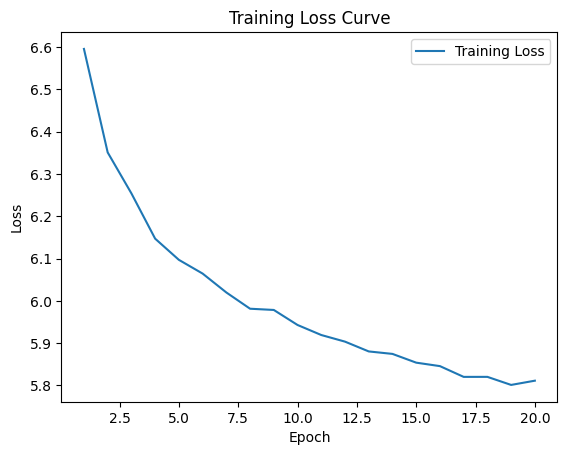

In [10]:
# Plot the learning curve
import matplotlib.pyplot as plt
plt.plot(np.arange(1, num_epochs + 1), loss_curve, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

In [99]:
x.shape
model(x).shape

torch.Size([31, 512])

In [125]:
import torch
torch.cuda.empty_cache()

In [11]:
caminho_do_arquivo = 'efficientnet_SwaV_model.pth'
torch.save(model, caminho_do_arquivo)

In [14]:
data = ImageDataLoader("../data/02_data_split/train_data/")
dataloader = DataLoader(data.dataset, batch_size=50, shuffle=False)

# select embedding model training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)
model.eval()

# compute embeddings and save
target = []
paths = []
labels = []
feature_embeddings = np.empty((0, 1280))

for i, (x, y, path, label) in enumerate(dataloader):
    x = x.to(device=device)
    with torch.no_grad():
        batch_features = model(x)

    batch_features_np = batch_features.view(batch_features.size(0), -1).cpu().numpy()
    feature_embeddings = np.vstack((feature_embeddings, batch_features_np))
    target.extend(list(y.cpu().detach().numpy()))
    paths.extend(slice_image_paths(path))
    labels.extend(label)


data_dict = {
    "model": 'efficientnet_SwaV',
    "embedding":feature_embeddings,
    "target":target,
    "paths": paths,
    "classes":labels
}

with open('./efficientnet_SwaV.pickle', 'wb') as pickle_file:
    pickle.dump(data_dict, pickle_file)

In [142]:
del loss

In [144]:
import gc

gc.collect()

13379